In [2]:
import pandas as pd

# load up the apple Series
appleFileLocation = "/home/chowder/Documents/personalData/Apple/"
appleWatchHRDf = pd.read_parquet(appleFileLocation + 'appleWatchHRdf.parquet.gzip') 
appleHRs = appleWatchHRDf["value"]

# load up the polar Series
polarFileLocation = "/home/chowder/Documents/personalData/polarFlow/"
polarHRdf = pd.read_parquet(polarFileLocation + "polarHRdf.parquet.gzip") 
polarHRs = polarHRdf["value"]

# load up the fitbit Series
fitbitFileLocation = "/home/chowder/Documents/personalData/fitbit/"
fitbitHRdf = pd.read_parquet(fitbitFileLocation + "fitbitHRdf.parquet.gzip") 
fitbitHRs = fitbitHRdf["value"]


50000
100000
150000
200000
250000
300000


In [31]:
inters = polarHRs.index.intersection(appleHRs.index)
polarHRs.loc[inters[0]:inters[-1]]

sampleDT
2024-07-16 23:24:02-07:00     96
2024-07-16 23:24:03-07:00     97
2024-07-16 23:24:04-07:00     98
2024-07-16 23:24:05-07:00     98
2024-07-16 23:24:06-07:00     99
                            ... 
2024-07-17 00:02:35-07:00    103
2024-07-17 00:02:36-07:00    104
2024-07-17 00:02:37-07:00    107
2024-07-17 00:02:38-07:00    106
2024-07-17 00:02:39-07:00    106
Name: value, Length: 2318, dtype: int64

In [34]:
appleHRs.loc[inters[0]:inters[-1]]

sampleDT
2024-07-16 23:24:02-07:00     90.000
2024-07-16 23:27:44-07:00    106.000
2024-07-16 23:30:51-07:00     93.000
2024-07-16 23:35:01-07:00    112.000
2024-07-16 23:35:06-07:00    114.000
2024-07-16 23:35:11-07:00    112.000
2024-07-16 23:39:18-07:00     94.000
2024-07-16 23:42:53-07:00     91.000
2024-07-16 23:45:49-07:00     93.000
2024-07-16 23:45:53-07:00     93.000
2024-07-16 23:45:55-07:00     93.000
2024-07-16 23:46:00-07:00     94.000
2024-07-16 23:46:05-07:00     97.000
2024-07-16 23:46:52-07:00     99.000
2024-07-16 23:46:58-07:00     95.000
2024-07-16 23:47:01-07:00     93.000
2024-07-16 23:47:04-07:00     95.000
2024-07-16 23:48:55-07:00    123.000
2024-07-16 23:51:38-07:00     96.000
2024-07-16 23:57:37-07:00     98.000
2024-07-17 00:02:23-07:00    107.000
2024-07-17 00:02:39-07:00    102.347
Name: value, dtype: float64

In [6]:
def getGroups(series, maxDelta = pd.Timedelta(minutes=11)):
    groups = []
    indexList = series.index.tolist()
    # groupNum = 0


    groupToadd = [indexList[0]]

    for sli in range(1, len(indexList)):
        if indexList[sli] - indexList[sli-1] > maxDelta:
            groupNum += 1
            groupToadd.append(indexList[sli-1])
            groups.append(groupToadd)

            groupToadd = [indexList[sli]]
    
    tssToadd.append(indexList[-1])
    groupToadd.append(tssToadd)
    groups.append(groupToadd)
    return groups




In [7]:
appleGroups = getGroups(appleHRs)
polarGroups = getGroups(polarHRs)
fitbitGroups = getGroups(polarHRs)

In [8]:
print(len(appleGroups))
print(len(polarGroups))
print(len(fitbitGroups))

[4339,
 [Timestamp('2024-07-16 12:43:37-0700', tz='pytz.FixedOffset(-420)'),
  Timestamp('2024-07-17 06:21:01-0700', tz='pytz.FixedOffset(-420)')]]

In [35]:

def getOverlappingGroups(seriesGroups):
    """
    return a list of groups 
    """
    overlappingGroups = set(seriesGroups[0])
    for seriesi in range(len(seriesGroups)-1):



SyntaxError: unexpected EOF while parsing (2650622497.py, line 6)

In [18]:
# I want more out of this function
# an arbitrary number of groups
# return sections that fully overlap and not cascading subsets



def getOverlappingSamples(groups1, s1, s2, maxDelta = pd.Timedelta(minutes=11)):
    # output is
    # [[s1 Samples indexes], [s2 samples indexes]]
    
    return [
            [
            s1.loc[g[1][0]:g[1][1]].index.tolist(), 
            s2.loc[g[1][0] - maxDelta:g[1][1] + maxDelta].index.tolist()
            ] for g in groups1
            if len(s2.loc[g[1][0] - maxDelta:g[1][1] + maxDelta]) > 0 
         ]

In [21]:
overlappingAppleData, overlappingPolarData = getOverlappingSamples(appleGroups, appleHRs, polarHRs)[0]

In [27]:
overlappingPolarData[0]

Timestamp('2024-07-16 23:21:52-0700', tz='pytz.FixedOffset(-420)')

In [32]:
overlappingPolarData[-1]

Timestamp('2024-07-17 00:07:36-0700', tz='pytz.FixedOffset(-420)')

In [33]:
len(overlappingPolarData)

2745

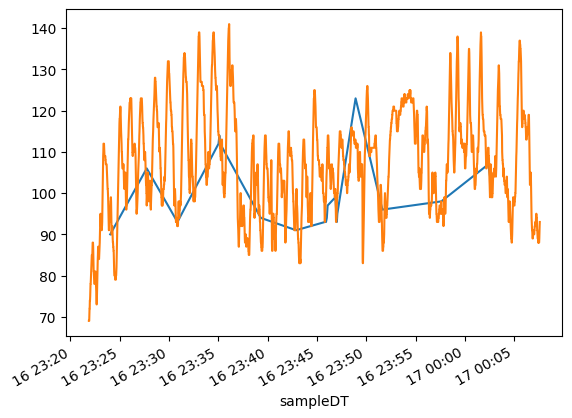

In [26]:
#graph a group like that 

ax = appleHRs.loc[polarHRs.loc[overlappingPolarData].index[0]:polarHRs.loc[overlappingPolarData].index[-1]].plot.line()
ax.plot(polarHRs.loc[overlappingPolarData])